In [1]:
import pm4py
import pandas as pd

In [2]:
filename = ('SampleData.csv')

In [3]:
data = pd.read_csv(filename)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        1004 non-null   object 
 1   Role            1004 non-null   object 
 2   VendorID        1004 non-null   object 
 3   InvoiceValue    1004 non-null   float64
 4   Resource        1004 non-null   object 
 5   StartTimestamp  1004 non-null   object 
 6   EndTimestamp    1004 non-null   object 
 7   CaseId          1004 non-null   int64  
 8   ActivityName    1004 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.7+ KB


In [5]:
data.head(3)

,Location,Role,VendorID,InvoiceValue,Resource,StartTimestamp,EndTimestamp,CaseId,ActivityName
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:50.502475,2022-07-28 17:59:05.502475,0,Invoice Entry
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:05.502475,2022-07-29 00:43:19.302475,0,Check Customer Payment
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:19.302475,2022-07-29 15:04:04.902475,0,Credit Memo Entry


In [6]:
data = pm4py.format_dataframe(data, case_id='CaseId', activity_key='ActivityName', timestamp_key='EndTimestamp', start_timestamp_key='StartTimestamp', timest_format='%Y-%m-%d %H:%M:%S%z')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1004 non-null   object 
 1   Role               1004 non-null   object 
 2   VendorID           1004 non-null   object 
 3   InvoiceValue       1004 non-null   float64
 4   Resource           1004 non-null   object 
 5   StartTimestamp     1004 non-null   object 
 6   EndTimestamp       1004 non-null   object 
 7   CaseId             1004 non-null   int64  
 8   ActivityName       1004 non-null   object 
 9   case:concept:name  1004 non-null   string 
 10  concept:name       1004 non-null   string 
 11  time:timestamp     1004 non-null   object 
 12  @@index            1004 non-null   int64  
 13  start_timestamp    1004 non-null   object 
dtypes: float64(1), int64(2), object(9), string(2)
memory usage: 109.9+ KB


In [8]:
data.head(3)

,Location,Role,VendorID,InvoiceValue,Resource,StartTimestamp,EndTimestamp,CaseId,ActivityName,case:concept:name,concept:name,time:timestamp,@@index,start_timestamp
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:50.502475,2022-07-28 17:59:05.502475,0,Invoice Entry,0,Invoice Entry,2022-07-28 17:59:05.502475,0,2022-07-28 09:23:50.502475
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:05.502475,2022-07-29 00:43:19.302475,0,Check Customer Payment,0,Check Customer Payment,2022-07-29 00:43:19.302475,1,2022-07-28 17:59:05.502475
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:19.302475,2022-07-29 15:04:04.902475,0,Credit Memo Entry,0,Credit Memo Entry,2022-07-29 15:04:04.902475,2,2022-07-29 09:43:19.302475


In [9]:
start_activities = pm4py.get_start_activities(data)

In [10]:
start_activities

{'Invoice Entry': 133}

In [11]:
end_activities = pm4py.get_end_activities(data)

In [12]:
end_activities

{'Re-issuing the invoice': 133}

In [13]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(data)

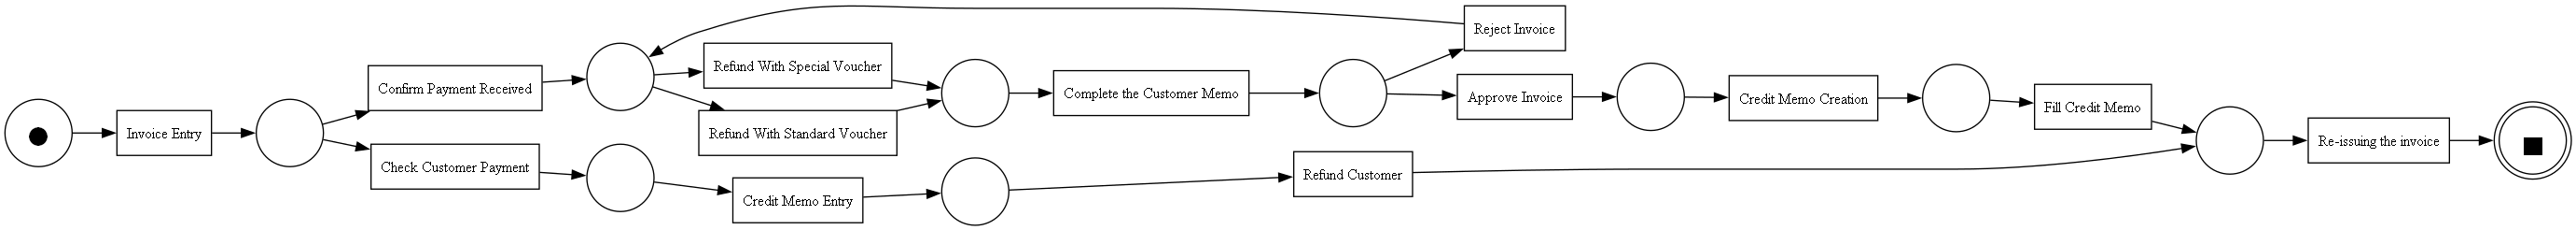

In [15]:
## Import the petrinet visualizer object
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

In [ ]:
3 # a log in the XES format is imported
4 log = pm4py.read_xes(’tests/input_data/receipt.xes’)
5
6 # the log is filtered on the top 5 variants
7 filtered_log = pm4py.filter_variants_top_k(log, 5)
8
9 # a directly -follows graph (DFG) is discovered from the log
10 dfg, start_activities , end_activities = pm4py.discover_dfg(filtered_log)
11
12 # a process tree is discovered using the inductive miner
13 process_tree = pm4py.discover_process_tree_inductive(filtered_log)
14 # the process tree is converted to an accepting Petri net
15 petri_net , initial_marking , final_marking = pm4py.convert_to_petri_net(process_tree)
process_tree = pm4py.discover_process_tree_inductive(filtered_log)
16 # the accepting Petri net is converted to a BPMN diagram
17 bpmn_diagram = pm4py.convert_to_bpmn(petri_net , initial_marking , final_marking)
18
19 # the discovered process models are shown on the screen as .svg images
20 pm4py.view_dfg(dfg, start_activities , end_activities , format=’svg’)
21 pm4py.view_process_tree(process_tree , format=’svg’)
22 pm4py.view_petri_net(petri_net , initial_marking , final_marking , format=’svg’)
23 pm4py.view_bpmn(bpmn_diagram , format=’svg’)
24
25 # we compare the original log versus the discovered model
26 fitness = pm4py.fitness_token_based_replay(log, petri_net , initial_marking , final_marking)
27 precision = pm4py.precision_token_based_replay(log, petri_net , initial_marking , final_marking)
28
29 print(fitness) # 0.984
30 print(precision) # 0.758
31
32 # we check if the discovered model is a sound workflow net
33 is_sound_wfnet = pm4py.check_soundness(petri_net , initial_marking , final_marking)[0]
34 print(is_sound_wfnet) # True